# Calibration using Zhang's procedure

In [1]:
from matplotlib import pyplot as plt
import os
import numpy as np
import cv2 # OpenCV
from calibration import Calibrator

## 1. Calibrate using Zhang procedure, i.e., find the intrinsic parameters K and, for each image, the pair of R, t (extrinsic);

In [2]:
calibrator = Calibrator((9,6), 24/1000)

folderpath = './phone_images'
images_path = [os.path.join(folderpath, imagename) for imagename in os.listdir(folderpath) if imagename.endswith(".jpeg")]
images_path.sort()
limages = []

for path in images_path:
    image = cv2.imread(path)
    limages.append(image)

calibrator.fit(limages, radial_distortion=False, iterative=False)
print("K:",calibrator.K)
print("Rotation matrices:")
for i,R in enumerate(calibrator.rotations):
   print(f"R{i+1}:{R}")
print("Translation vectors:")
for i,t in enumerate(calibrator.translations):
    print(f"t{i+1}:{t}")

K: [[ 1.71774872e+03 -1.36160918e+01  4.93518033e+02]
 [ 0.00000000e+00  1.74032641e+03  1.07378938e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Rotation matrices:
R1:[[ 0.8194804   0.57305472 -0.00775579]
 [ 0.38888943 -0.56595875 -0.72694959]
 [-0.42097135  0.59270479 -0.68664703]]
R2:[[ 0.9925071  -0.03190865  0.11794702]
 [-0.02928344 -0.9992848  -0.02392433]
 [ 0.11862606  0.02029117 -0.99273165]]
R3:[[-0.99980199  0.01984665 -0.00144644]
 [ 0.0192616   0.98345659  0.18011697]
 [ 0.00499723  0.18005345 -0.98364413]]
R4:[[-0.82496566  0.56496117  0.01582846]
 [ 0.37993163  0.57508136 -0.72452287]
 [-0.41842994 -0.59169275 -0.68906899]]
R5:[[ 0.80579709 -0.52224542  0.27919663]
 [-0.16626547 -0.65201565 -0.7397509 ]
 [ 0.5683721   0.54966836 -0.61222369]]
R6:[[-0.93834708  0.00350427 -0.34567683]
 [ 0.14334398  0.91387613 -0.37984593]
 [ 0.31457473 -0.40597801 -0.85803531]]
R7:[[ 0.51887369 -0.85477169  0.01163848]
 [-0.77352601 -0.47526362 -0.41926365]
 [ 0.36390604  0.

## 2. Choose one of the calibration images and compute the total reprojection error for all the grid points (adding a figure with the reprojected points);
We will perform the procedure on the 8-th image, first with the basic procedure then with the iterative one
### Basic procedure

[np.float64(2176.0390155554846), np.float64(1364.081254491408), np.float64(608.2029104871978), np.float64(10168.237485231233), np.float64(8769.725971745656), np.float64(2210.2493155700727), np.float64(1815.9028902288712), np.float64(5419.164637222645), np.float64(54793.03204721456), np.float64(68967.27983744623), np.float64(1752.4563618119394), np.float64(59963.98854386288), np.float64(2324.214800848735), np.float64(966.8789823919662), np.float64(6736.086694856948), np.float64(2597.532117615092), np.float64(2171.1143114248075), np.float64(504.53848946278646), np.float64(974.6324651016832), np.float64(4527.565007230178), np.float64(576.9910055981004)]


Text(0.5, 1.0, 'Total reprojection error: 10168.237485231233')

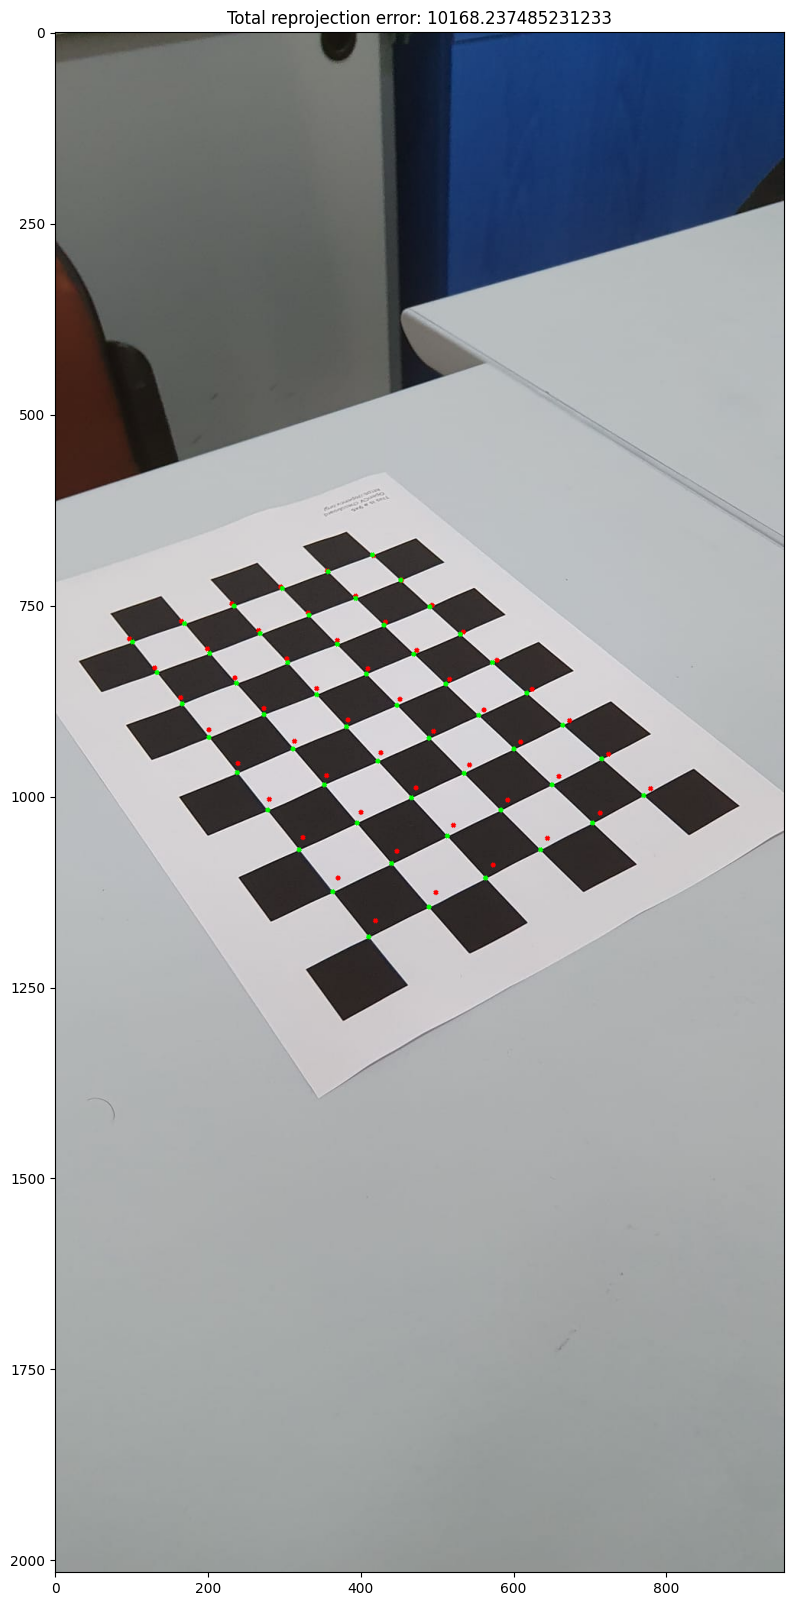

In [3]:
calibrator.fit(limages, radial_distortion=False, iterative=False)
print(calibrator.reprojection_errors)
index = 3
R, P, error = calibrator.real_coords, calibrator.projection_matrices[index], calibrator.reprojection_errors[index]
image7 = cv2.imread(images_path[index])
proj_chess = np.transpose(P@R.T)
proj_chess[:,0] = proj_chess[:,0]/proj_chess[:,2]
proj_chess[:,1] = proj_chess[:,1]/proj_chess[:,2]
proj_chess = proj_chess[:,:-1]
copy1 = image7.copy()
for point in proj_chess:
    copy1 = cv2.drawMarker(img=copy1,
                           position=tuple(np.array(point, dtype=np.int32)),
                           color=(255,0,0),
                           markerType=cv2.MARKER_TILTED_CROSS,
                           thickness=4,
                           markerSize=2
                           )
copy2= copy1.copy()
for point in calibrator.pix_coords[index]:
    copy2 = cv2.drawMarker(img=copy2,
                           position=tuple(np.array(point, dtype=np.int32)),
                           color=(0,255,0),
                           markerType=cv2.MARKER_TILTED_CROSS,
                           thickness=4,
                           markerSize=2
                           )
plt.figure(figsize=(20,20))
plt.imshow(copy2)
plt.title(f"Total reprojection error: {error}")

### Iterative refinement

[np.float64(110.29212186333993), np.float64(39.40264157711973), np.float64(23.22108387605006), np.float64(115.21548171867724), np.float64(110.43044293907386), np.float64(49.24147072529505), np.float64(83.69135986723506), np.float64(152.9853850446186), np.float64(212.0572628532073), np.float64(217.23339290392977), np.float64(131.82354718896082), np.float64(164.51970876506488), np.float64(137.05266184955678), np.float64(71.85424473569532), np.float64(130.96454969158623), np.float64(151.77242745275083), np.float64(73.97861832907576), np.float64(65.31114826208764), np.float64(64.30460411811738), np.float64(84.97672746016936), np.float64(48.90148370738234)]


Text(0.5, 1.0, 'Total reprojection error: 115.21548171867724')

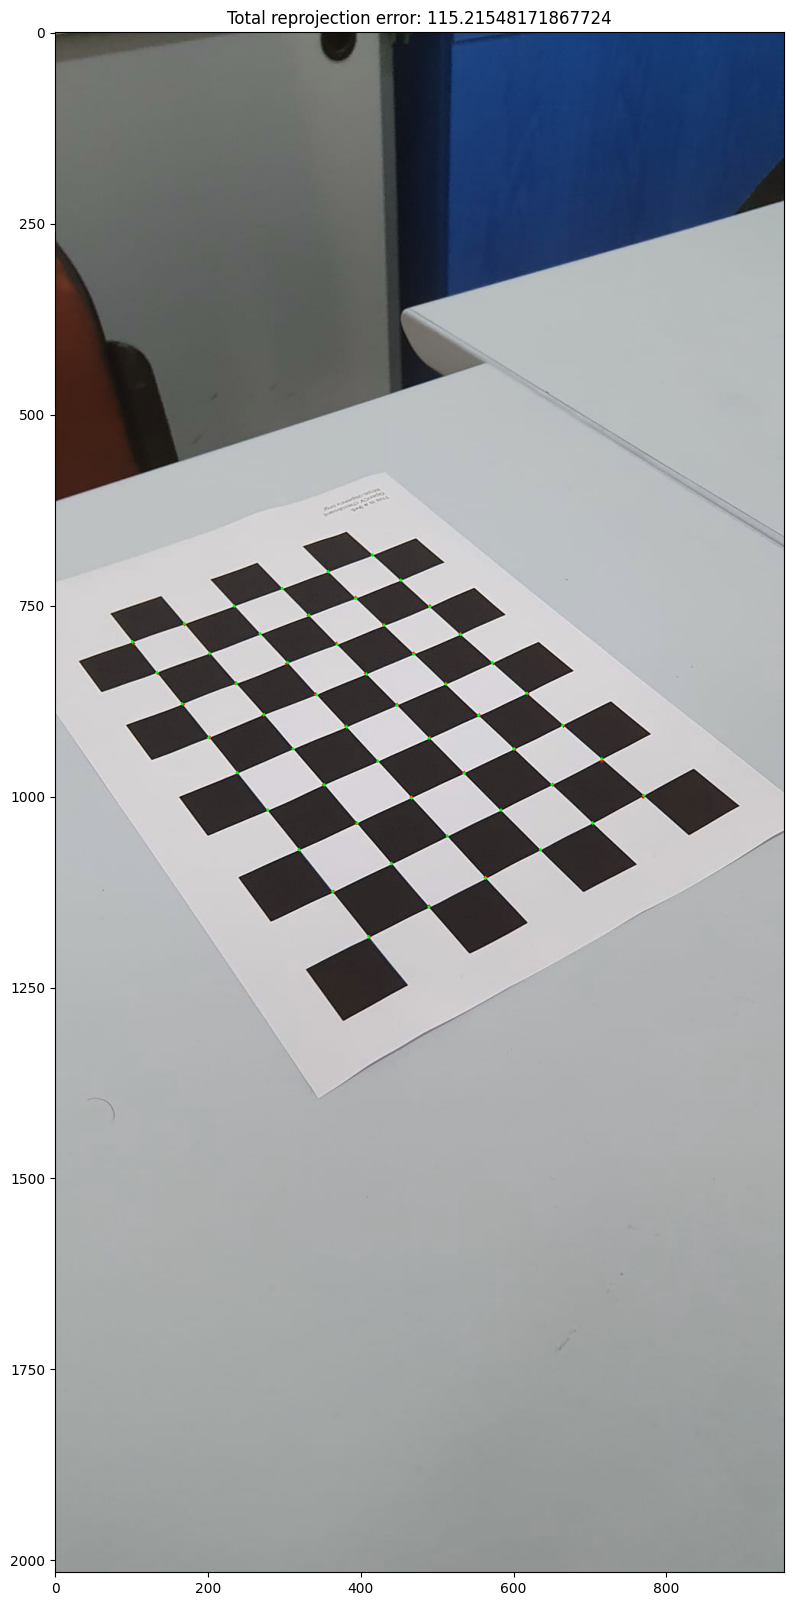

In [4]:
calibrator.fit(limages, radial_distortion=False, iterative=True)
print(calibrator.reprojection_errors)
R, P, error = calibrator.real_coords, calibrator.projection_matrices[index], calibrator.reprojection_errors[index]
image7 = cv2.imread(images_path[index])
proj_chess = np.transpose(P@R.T)
proj_chess[:,0] = proj_chess[:,0]/proj_chess[:,2]
proj_chess[:,1] = proj_chess[:,1]/proj_chess[:,2]
proj_chess = proj_chess[:,:-1]
copy1 = image7.copy()
for point in proj_chess:
    copy1 = cv2.drawMarker(img=copy1,
                           position=tuple(np.array(point, dtype=np.int32)),
                           color=(255,0,0),
                           markerType=cv2.MARKER_TILTED_CROSS,
                           thickness=3,
                           markerSize=1
                           )
copy2= copy1.copy()
for point in calibrator.pix_coords[index]:
    copy2 = cv2.drawMarker(img=copy2,
                           position=tuple(np.array(point, dtype=np.int32)),
                           color=(0,255,0),
                           markerType=cv2.MARKER_TILTED_CROSS,
                           thickness=3,
                           markerSize=1
                           )
plt.figure(figsize=(20,20))
plt.imshow(copy2)
plt.title(f"Total reprojection error: {error}")

[np.float64(41.92575954901849), np.float64(18.161566494460484), np.float64(21.08772052242841), np.float64(50.93457362541283), np.float64(53.68740533661815), np.float64(27.564558245543097), np.float64(37.888422863677064), np.float64(51.921724159950614), np.float64(204.40933195625004), np.float64(83.20666076315183), np.float64(95.70499600736177), np.float64(64.84703195034737), np.float64(39.634230923965944), np.float64(35.8777193642606), np.float64(24.240040975697813), np.float64(47.57583816115653), np.float64(23.87643908698053), np.float64(28.91644309975681), np.float64(31.956838149278735), np.float64(33.97474243273124), np.float64(15.742860636871708)]


Text(0.5, 1.0, 'Total reprojection error: 50.93457362541283')

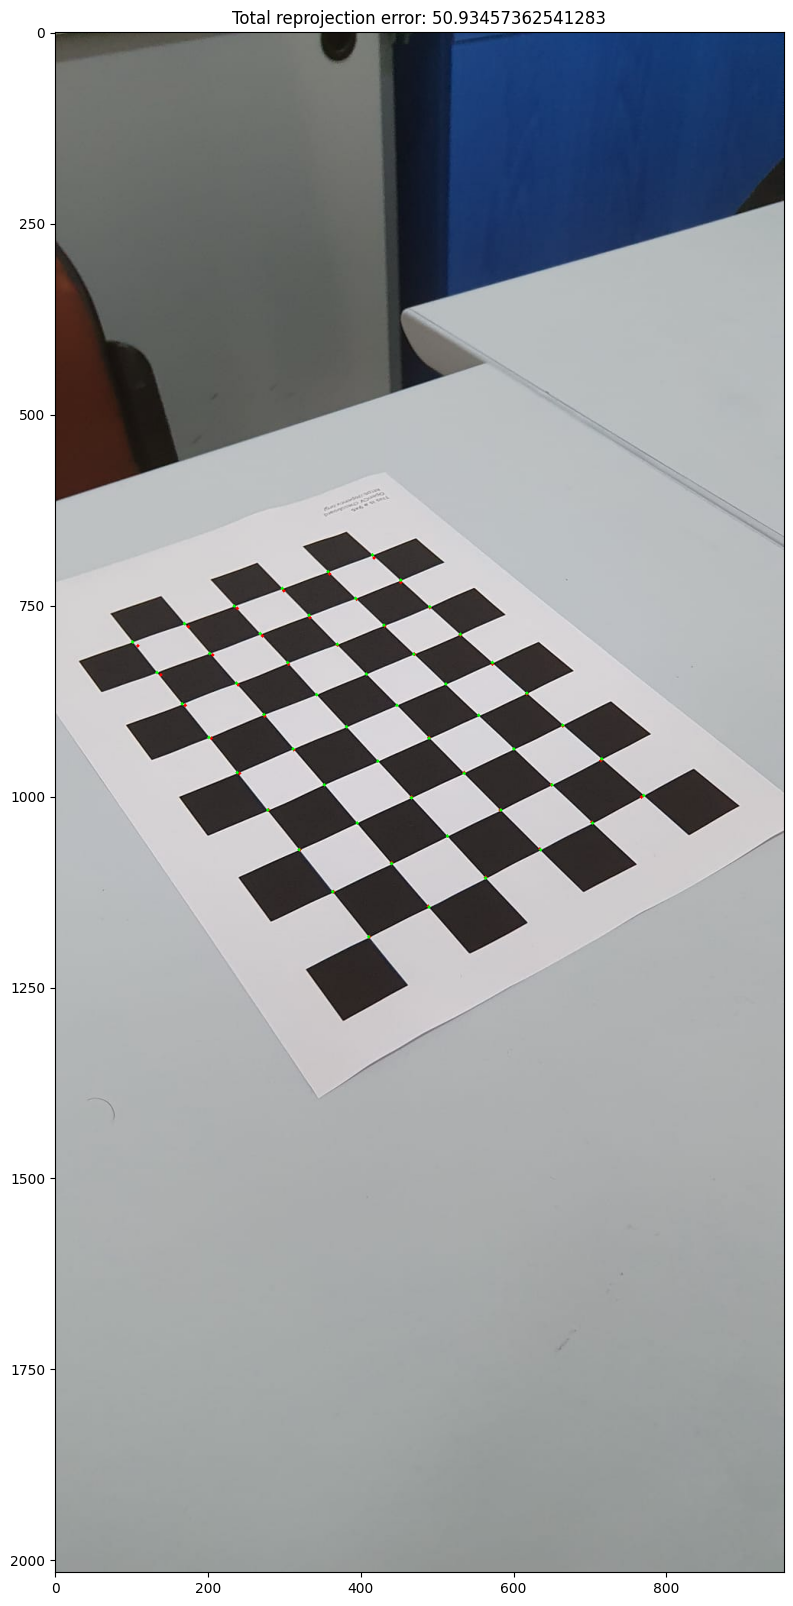

In [5]:
calibrator.fit(limages, radial_distortion=True, iterative=True)
print(calibrator.reprojection_errors)
R, P, error = calibrator.real_coords, calibrator.projection_matrices[index], calibrator.reprojection_errors[index]
image7 = cv2.imread(images_path[index])
proj_chess = np.transpose(P@R.T)
proj_chess[:,0] = proj_chess[:,0]/proj_chess[:,2]
proj_chess[:,1] = proj_chess[:,1]/proj_chess[:,2]
proj_chess = proj_chess[:,:-1]
copy1 = image7.copy()
for point in proj_chess:
    copy1 = cv2.drawMarker(img=copy1,
                           position=tuple(np.array(point, dtype=np.int32)),
                           color=(255,0,0),
                           markerType=cv2.MARKER_TILTED_CROSS,
                           thickness=3,
                           markerSize=1
                           )
copy2= copy1.copy()
for point in calibrator.pix_coords[index]:
    copy2 = cv2.drawMarker(img=copy2,
                           position=tuple(np.array(point, dtype=np.int32)),
                           color=(0,255,0),
                           markerType=cv2.MARKER_TILTED_CROSS,
                           thickness=3,
                           markerSize=1
                           )
plt.figure(figsize=(20,20))
plt.imshow(copy2)
plt.title(f"Total reprojection error: {error}")

## 3. Superimpose an object (for instance, a cylinder), to the calibration plane, in all the images employed for the calibration;

In [6]:
# Funzione generata con Microsoft Copilot
def create_image_grid(image_list, grid_size, is_bw=False):
    rows, cols = grid_size
    if len(image_list) != rows * cols:
        raise ValueError("Il numero di immagini non corrisponde alla dimensione della griglia")

    img_height, img_width = image_list[0].shape[:2]

    if not is_bw:
        grid_image = np.zeros((rows * img_height, cols * img_width, 3), dtype=np.uint8)
    else:
        grid_image = np.zeros((rows * img_height, cols * img_width), dtype=np.uint8)

    for idx, img in enumerate(image_list):
        row = idx // cols
        col = idx % cols
        grid_image[row * img_height:(row + 1) * img_height, col * img_width:(col + 1) * img_width] = img

    return grid_image

In [7]:
pts = cv2.ellipse2Poly((96,120), (48,48), 0, 0, 360, 1)
pts = pts/1000
et_low = np.empty_like(pts)
et_high = np.empty_like(et_low)
pts_low = np.hstack((pts, np.zeros((pts.shape[0],1)), np.ones((pts.shape[0],1))))
pts_high = np.hstack((pts, np.full((pts.shape[0],1), 0.120), np.ones((pts.shape[0],1))))

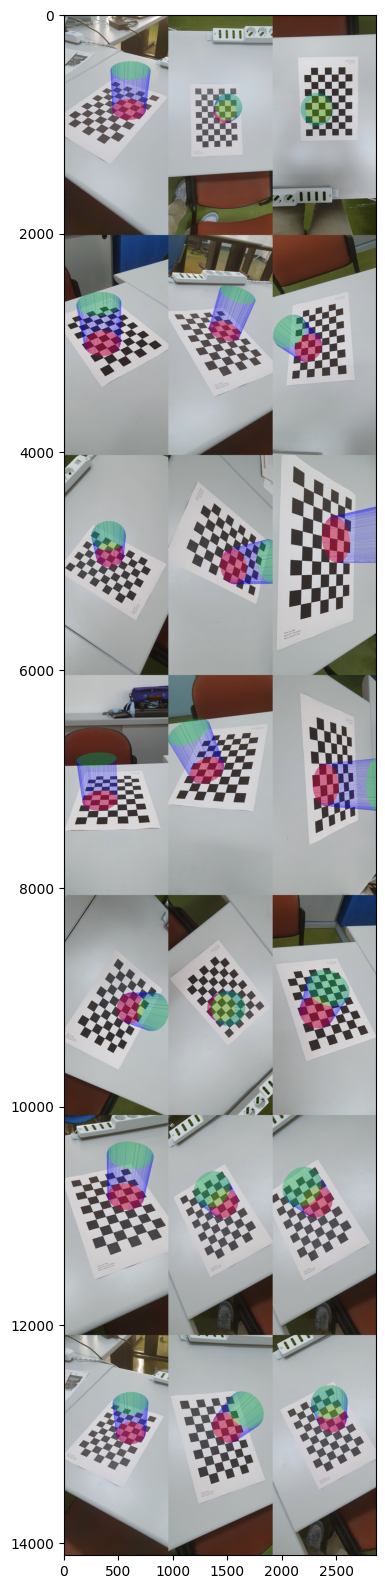

In [8]:
image_list = []
for i,path in enumerate(images_path):
    original = cv2.imread(path)
    P = calibrator.projection_matrices[i]

    proj_low = np.transpose(P @ pts_low.T)
    et_low[:,0] = proj_low[:,0]/proj_low[:,2]
    et_low[:,1] = proj_low[:,1]/proj_low[:,2]

    proj_high = np.transpose(P @ pts_high.T)
    et_high[:,0] = proj_high[:,0]/proj_high[:,2]
    et_high[:,1] = proj_high[:,1]/proj_high[:,2]

    img2 = original.copy()
    img2 = cv2.fillConvexPoly(img2,np.array(et_low, dtype=np.int32),(255,0,0))
    img3 = cv2.fillConvexPoly(img2.copy(),np.array(et_high, dtype=np.int32),(0,255,0))
    img4 = original.copy()
    for i in range(et_low.shape[0]):
        img4 = cv2.line(img4, tuple(np.array(et_low[i], dtype=np.int32)), tuple(np.array(et_high[i], dtype=np.int32)),(0,0,255))
    img2 = cv2.addWeighted(img2, 0.5, original, 0.5, 0)
    img3 = cv2.addWeighted(img2, 0.5, img3, 0.5, 0)
    img4 = cv2.addWeighted(img3, 0.5, img4, 0.5, 0)
    image_list.append(img4)

compound = create_image_grid(image_list, (7,3))
plt.figure(figsize=(20,20))
plt.imshow(compound)

[np.float64(41.92575954901849), np.float64(18.161566494460484), np.float64(21.08772052242841), np.float64(50.93457362541283), np.float64(53.68740533661815), np.float64(27.564558245543097), np.float64(37.888422863677064), np.float64(51.921724159950614), np.float64(204.40933195625004), np.float64(83.20666076315183), np.float64(95.70499600736177), np.float64(64.84703195034737), np.float64(39.634230923965944), np.float64(35.8777193642606), np.float64(24.240040975697813), np.float64(47.57583816115653), np.float64(23.87643908698053), np.float64(28.91644309975681), np.float64(31.956838149278735), np.float64(33.97474243273124), np.float64(15.742860636871708)]
[[185 183 183 ... 234 232 232]
 [187 184 183 ... 234 235 235]
 [189 186 184 ... 234 235 235]
 ...
 [240 240 240 ... 254   2   3]
 [240 240 240 ... 254 254 254]
 [239 239 238 ... 255 247 247]] 0 255


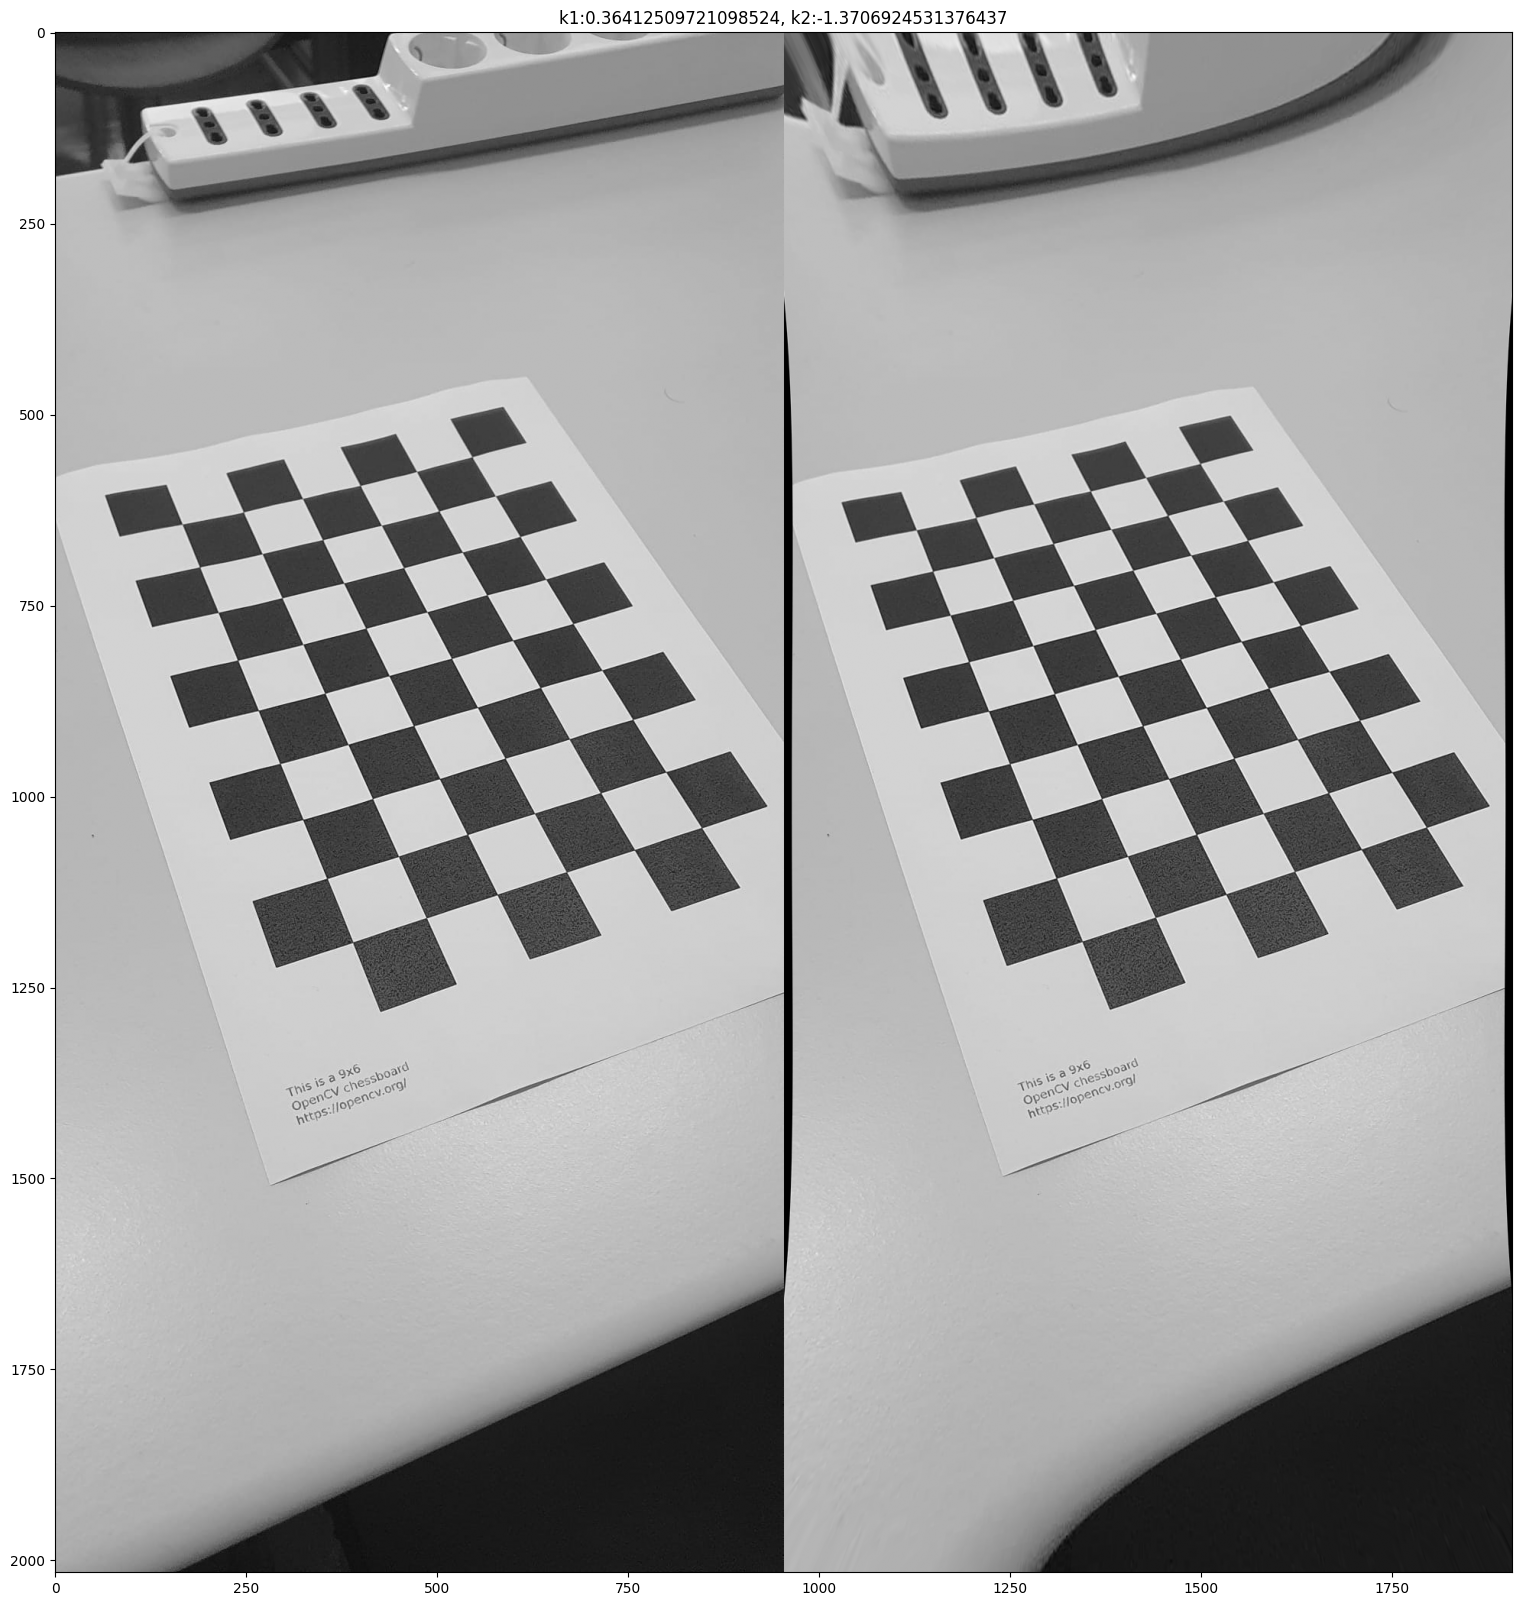

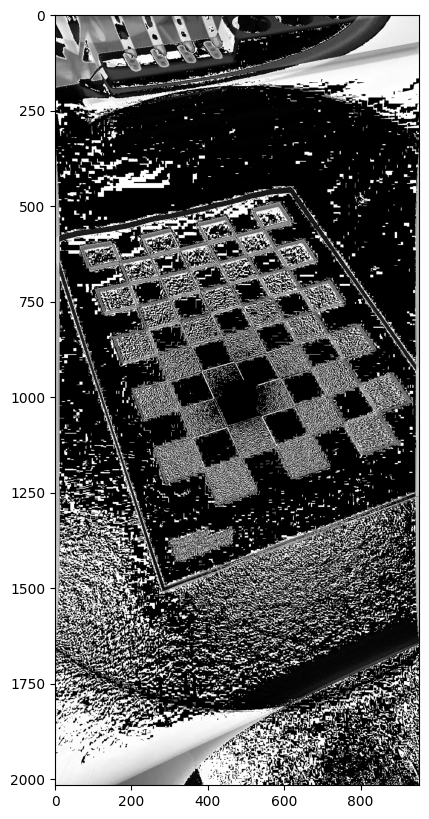

In [9]:
calibrator.fit(limages, radial_distortion=True, iterative=True)
print(calibrator.reprojection_errors)
index = 15
image7 = cv2.imread(images_path[index])
image7 = cv2.cvtColor(image7.copy(), cv2.COLOR_BGR2GRAY)
undistorted7 = calibrator.compensate_radial_distortion(image7)
limage1 = [image7, undistorted7]
compound = create_image_grid(limage1, (1,2), True)
diff = image7 - undistorted7
print(diff, np.min(diff), np.max(diff))
plt.figure(figsize=(20,20))
plt.imshow(compound, cmap='gray')
plt.title(f"k1:{calibrator.distortion_parameters[0]}, k2:{calibrator.distortion_parameters[1]}")

plt.figure(figsize=(10,10))
plt.imshow(diff, cmap='gray')